In [1]:
import math
def AMS(s, b):
    return math.sqrt(2*((s+b)*math.log(1+s/b)-s))

/afs/hep.wisc.edu/user/kaho/NDHiggs/coffeaenv_local/lib64/python3.6/site-packages/coffea/hist/plot.py:45: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,


<AxesSubplot:xlabel='$m^{e\\mu}$ [GeV]', ylabel='Events'>

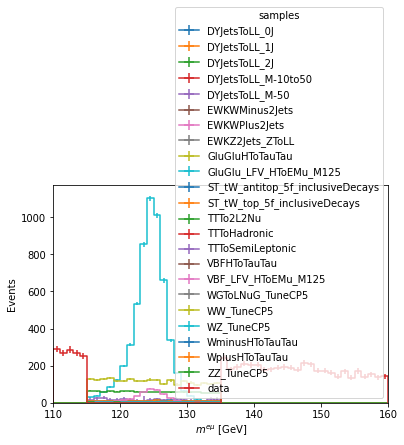

In [2]:
from coffea.util import save, load
from coffea import hist

histo = load("../results/2017/bTagWP/output.coffea")
hist.plot1d(histo[0]['emMass_deepjet_L'])

<AxesSubplot:xlabel='$m^{e\\mu}$ [GeV]', ylabel='Events'>

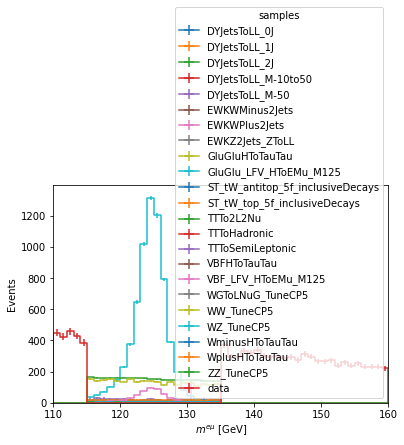

In [3]:
hist.plot1d(histo[0]['emMass_deepjet_M'])

In [10]:
from coffea.util import save, load
from coffea import hist

histo = load("../results/2017/bTagWP/output.coffea")

deepJet_None, deepJet_L, deepJet_M = histo[0]['emMass'], histo[0]['emMass_deepjet_L'], histo[0]['emMass_deepjet_M']
#deepcsv_L, deepcsv_M = histo[0]['emMass_deepcsv_L'].values(), histo[0]['emMass_deepcsv_M'].values()

list_of_t = ['TTTo2L2Nu', 'TTToSemiLeptonic', 'TTToHadronic', 
              'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 
              'ST_t-channel_antitop_5f_inclusiveDecays', 'ST_t-channel_top_5f_InclusiveDecays']

list_of_SMH = ['GluGluHToTauTau', 'VBFHToTauTau', 
               'WminusHToTauTau', 'WplusHToTauTau', 
               'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau']

list_of_diboson = ['ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5']

list_of_DY = ['DYJetsToLL_M-50', 'DYJetsToLL_0J', 'DYJetsToLL_1J', 'DYJetsToLL_2J', 'DYJetsToLL_M-10to50']

list_of_WJ = ['WJetsToLNu_TuneCP5', '"WJetsToLNu_0J', 'WJetsToLNu_1J', 'WJetsToLNu_2J', 'WGToLNuG_TuneCP5']

list_of_EWK = ['EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets']

signals = ['GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125']

bkgs = list_of_t+list_of_SMH+list_of_diboson+list_of_DY+list_of_WJ+list_of_EWK

data_None, data_Jet_L, data_Jet_M = deepJet_None[('data',)].to_hist().sum().value, deepJet_L[('data',)].to_hist().sum().value, deepJet_M[['data'], :].to_hist().sum().value   #[('data',)].sum(), deepJet_M[('data',)].sum()

# # data_csv_L, data_csv_M = deepcsv_L[('data',)].sum(), deepcsv_M[('data',)].sum()

signal_None = deepJet_None[(signals,)].to_hist().sum().value*5.9*10**-3
signal_Jet_L = deepJet_L[(signals,)].to_hist().sum().value*5.9*10**-3
signal_Jet_M = deepJet_M[(signals,)].to_hist().sum().value*5.9*10**-3

t_None = deepJet_None[(list_of_t,)].to_hist().sum().value
t_Jet_L = deepJet_L[(list_of_t,)].to_hist().sum().value
t_Jet_M = deepJet_M[(list_of_t,)].to_hist().sum().value

bkg_None = deepJet_None[(bkgs,)].to_hist().sum().value
bkg_Jet_L = deepJet_L[(bkgs,)].to_hist().sum().value
bkg_Jet_M = deepJet_M[(bkgs,)].to_hist().sum().value


# for i in signals:
#     signal_Jet_L+= deepJet_L[(i,)].sum()
#     signal_Jet_M+= deepJet_M[(i,)].sum()
# #     signal_csv_L+= deepcsv_L[(i,)].sum()
# #     signal_csv_M+= deepcsv_M[(i,)].sum()

# for i in bkgs:
#     bkg_Jet_L+= deepJet_L[(i,)].sum()
#     bkg_Jet_M+= deepJet_M[(i,)].sum()
# #     bkg_csv_L+= deepcsv_L[(i,)].sum()
# #     bkg_csv_M+= deepcsv_M[(i,)].sum()

print('kind', 'Jet L', 'Jet M', 'None')#, 'CSV L', 'CSV M' )
print('signal', signal_Jet_L, signal_Jet_M, signal_None)#, signal_csv_L, signal_csv_M)
print('bkg', bkg_Jet_L, bkg_Jet_M, bkg_None)#, bkg_csv_L, bkg_csv_M)
print('top', t_Jet_L, t_Jet_M, t_None)#, bkg_csv_L, bkg_csv_M)
print('data', data_Jet_L, data_Jet_M, data_None)#, data_csv_L, data_csv_M)
print('AMS', AMS(signal_Jet_L, bkg_Jet_L), AMS(signal_Jet_M, bkg_Jet_M), AMS(signal_None, bkg_None))#, AMS(signal_csv_M, bkg_csv_M), AMS(signal_csv_M, bkg_csv_M))

kind Jet L Jet M None
signal 35.48665648577142 36.00432688799178 43.98181479911887
bkg 3928.6889092801302 4165.065867971198 27439.239835073924
top 1184.3756968634727 1386.2429881029807 24150.22476189956
data 5792.0 5792.0 36468.0
AMS 0.5653135734487902 0.5570829343473449 0.2654429218720988


/afs/hep.wisc.edu/user/kaho/NDHiggs/coffeaenv_local/lib64/python3.6/site-packages/coffea/hist/hist_tools.py:377: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f98286a6e48>
  "Not all requested indices present in %r" % self, RuntimeWarning


93.02278108772077